In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random
from bandit import K_bandit, GreedyAlgorithm, run_experiment

plt.style.use("ggplot")

# Sample rewards

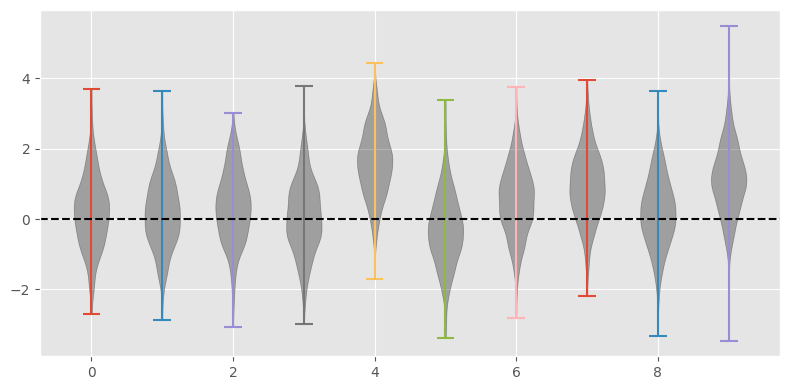

In [2]:
K = 10
T = 1000
N = 2000

bandit = K_bandit(K, 10)


fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for action, q in enumerate(bandit.q):
    samples = stats.norm(q, 1).rvs(1000)
    parts = ax.violinplot(samples, [action])
    for pc in parts["bodies"]:
        pc.set_facecolor("black")
        pc.set_edgecolor("black")
        # pc.set_alpha(0.6)

ax.axhline(0, color="black", alpha=1, linestyle="--")

fig.tight_layout()

# Epsilon value evaluation

In [3]:
N = 100
T = 1000
epsilons = [0, 0.1, 0.01]

rewards_scores = {epsilon: np.zeros((N, T)) for epsilon in epsilons}
correct_counts = {epsilon: np.zeros((N, T)) for epsilon in epsilons}

models = {epsilon: GreedyAlgorithm(K, epsilon, sample_averaging=True) for epsilon in epsilons}
REWARDS = bandit.simulate_game((N, T))

for epsilon in epsilons:
    model = models[epsilon]
    for n in range(N):
        model.init_model_params()
        for t in range(T):
            rewards = REWARDS[:, n, t]
            # agent turn
            action = model.act()
            model.step(action, rewards)
            # update simulation information
            if action == np.argmax(bandit.q):
                correct_counts[epsilon][n, t] += 1
            rewards_scores[epsilon][n, t] = rewards[action]

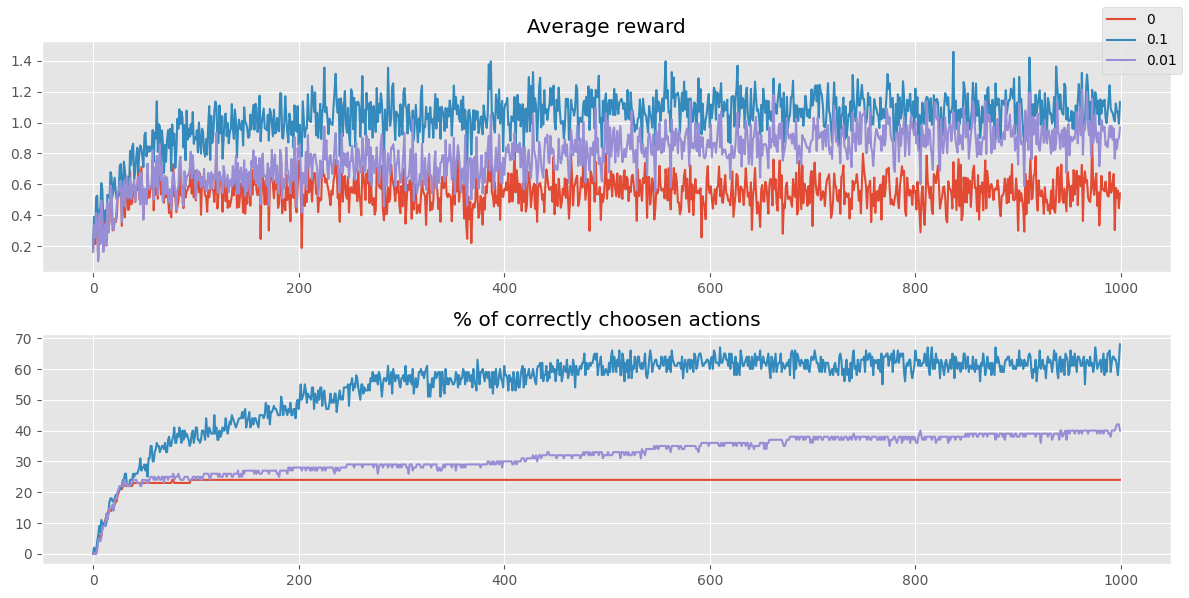

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

for name, scores in rewards_scores.items():
    ax1.plot(scores.mean(axis=0))

for name, scores in correct_counts.items():
    ax2.plot(scores.mean(axis=0) * 100)

ax1.set_title("Average reward")
ax2.set_title(r"% of correctly choosen actions")
fig.legend(rewards_scores)
fig.tight_layout()

# Non-stationary distribution example

In [5]:
N = 100  # 100
T = 10_000  # 10_000
K = 10

experiment_parameters = {"initial_distribution": "constant", "stationary": False}
all_model_params = {"epsilon": 0.1}
model_parameters = {
    "SA": {"sample_averaging": True},
    "IC_mean": {"sample_averaging": False, "stepsize": 0.0},
    "IC_fixed": {"sample_averaging": False, "stepsize": 0.1},
}

rewards_scores, correct_counts = run_experiment(K, N, T, experiment_parameters, all_model_params, model_parameters)

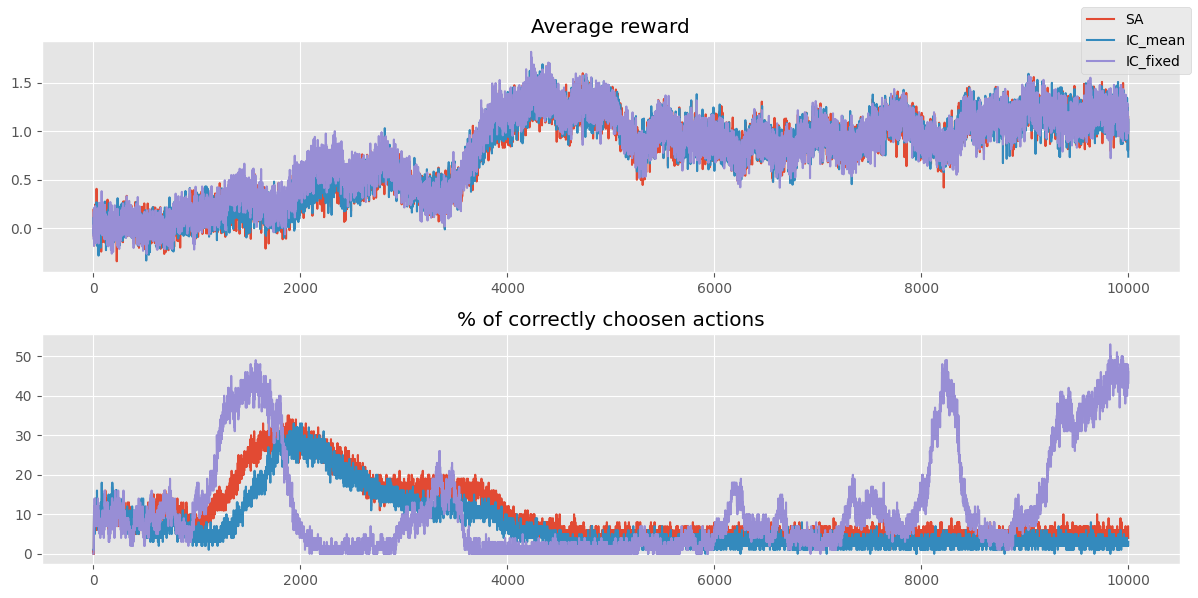

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

for name, scores in rewards_scores.items():
    ax1.plot(scores.mean(axis=0))

for name, scores in correct_counts.items():
    ax2.plot(scores.mean(axis=0) * 100)

ax1.set_title("Average reward")
ax2.set_title(r"% of correctly choosen actions")
fig.legend(rewards_scores)
fig.tight_layout()

# Optimistic intial conditions

In [7]:
N = 100  # 100
T = 1_000  # 10_000
K = 10

experiment_parameters = {"initial_distribution": "normal", "stationary": True}
all_model_params = {"epsilon": 0.1}
model_parameters = {
    "Realistic": {"sample_averaging": True},
    "Optimistic": {"sample_averaging": True, "Q_init": 5},
}

rewards_scores, correct_counts = run_experiment(K, N, T, experiment_parameters, all_model_params, model_parameters)

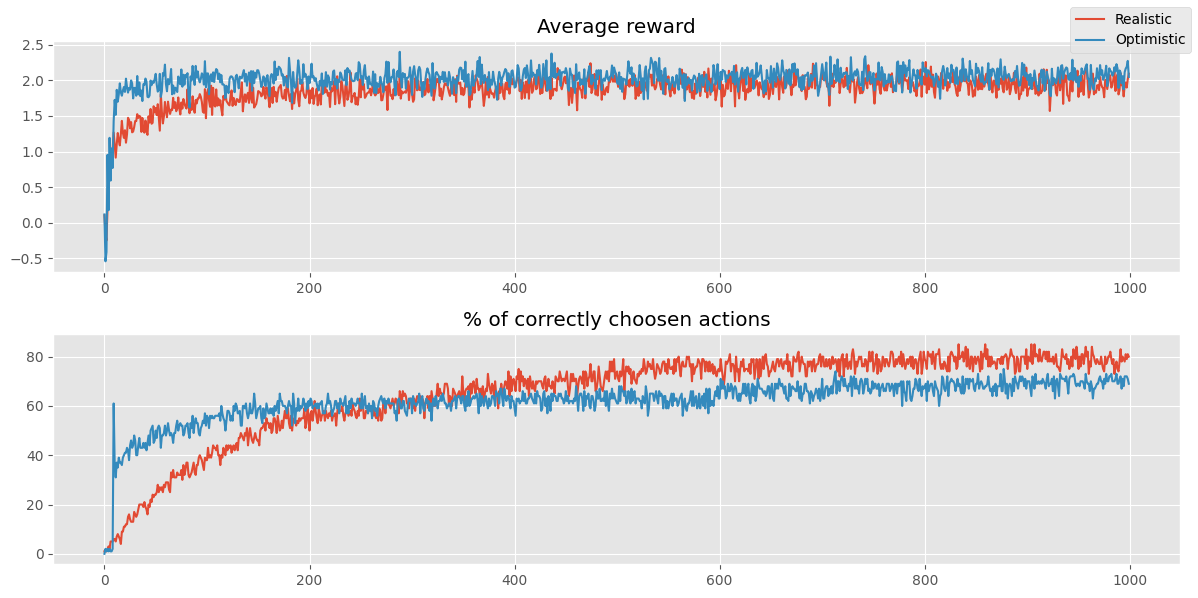

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

for name, scores in rewards_scores.items():
    ax1.plot(scores.mean(axis=0))

for name, scores in correct_counts.items():
    ax2.plot(scores.mean(axis=0) * 100)

ax1.set_title("Average reward")
ax2.set_title(r"% of correctly choosen actions")
fig.legend(rewards_scores)
fig.tight_layout()

# UBC trick test

In [9]:
N = 100  # 100
T = 10_000  # 10_000
K = 10

experiment_parameters = {"initial_distribution": "constant", "stationary": False}
all_model_params = {"epsilon": 0.1}
model_parameters = {
    "SA": {"sample_averaging": True},
    "IC_mean": {"sample_averaging": False, "stepsize": 0.0},
    "IC_fixed": {"sample_averaging": False, "stepsize": 0.1},
    "IC_fixed_trick": {"sample_averaging": False, "stepsize": 0.1, "UBC_trick": True},
}

rewards_scores, correct_counts = run_experiment(K, N, T, experiment_parameters, all_model_params, model_parameters)

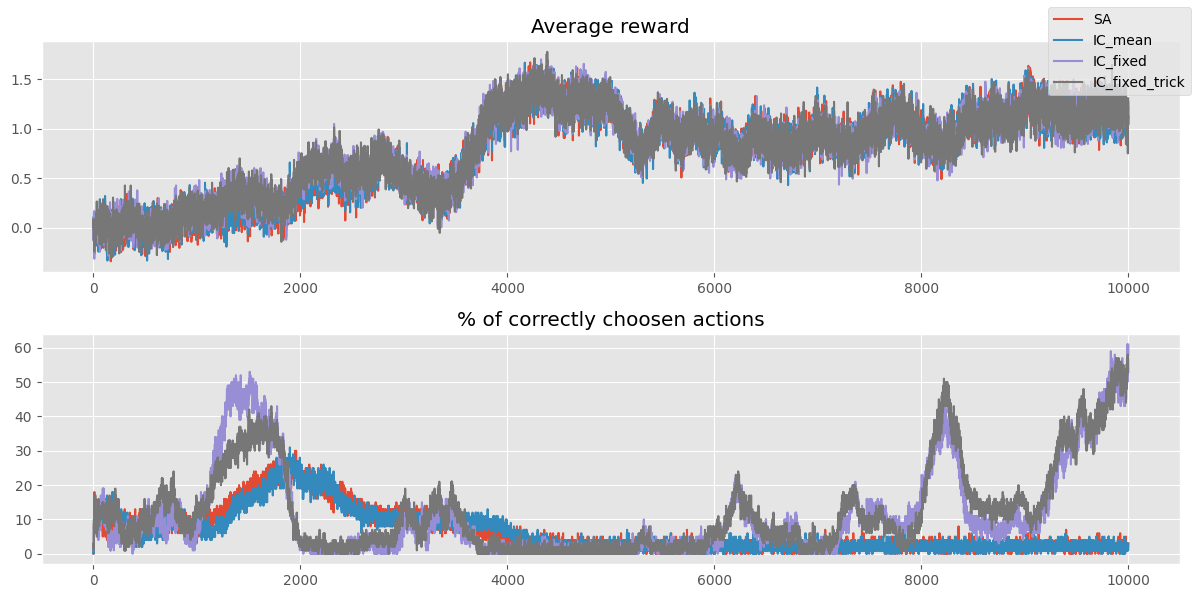

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

for name, scores in rewards_scores.items():
    ax1.plot(scores.mean(axis=0))

for name, scores in correct_counts.items():
    ax2.plot(scores.mean(axis=0) * 100)

ax1.set_title("Average reward")
ax2.set_title(r"% of correctly choosen actions")
fig.legend(rewards_scores)
fig.tight_layout()